# Implementing Lasso and inductive conformal predictor 

This assignment includes exploring and predicting data for the diabetes dataset (https://trevorhastie.github.io/data.html):

## Table of contents :
### 1. Implementing Lasso
1.1 Loading the dataset (Task 1)<br>
1.2 Splitting the dataset (Task 2)<br>
1.3 Computing R^2 for default parameters (Task 3) <br>
1.4 Loading/ Splitting the unnormalised dataset (Task 4, 5) <br>
1.5 Computing R^2 for default parameters (Task 6)<br>
1.6 Preprocessing data using StandardScaler (Task 7)<br>
1.7 Observation (Task 8)<br>
1.8 Computing R^2 for varying alpha values (Task 9)<br>
1.9 Obtaining optimum alpha using cross validation (Task 10)<br>

### 2. Implementing the inductive conformal predictor (Task 11)
2.1 Splitting dataset<br>
2.2 Preprocessing data using StandardScaler<br>
2.3 Calculating prediction intervals and error rates<br>

### 3. Conclusion

# 1. Implementing Lasso

### 1.1 Loading the dataset (Task 1)

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso, LassoCV
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
diabetes = load_diabetes()

### 1.2 Splitting the dataset (Task 2)

In [2]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=2110)

### 1.3 Computing R^2 for default parameters (Task 3)

In [3]:
print("Computing for the default dataset in sklearn")
print()
lasso = Lasso()
print("Feature names in the dataset:")
print(diabetes.feature_names)
print()
lasso.fit(X_train,y_train)
print("Coefficient list after fitting the training set:")
print(lasso.coef_)
print()
print("Lasso score for training dataset:")
print(lasso.score(X_train,y_train))
print()
print("Lasso score for test dataset:")
print(lasso.score(X_test,y_test))
print()
featureList = [ diabetes.feature_names[feature] for feature in np.where(lasso.coef_ != 0)[0] ] 
print("Final feature list as computed by Lasso:")
print(featureList)

Computing for the default dataset in sklearn

Feature names in the dataset:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Coefficient list after fitting the training set:
[  0.          -0.         332.68237952   0.           0.
   0.          -0.           0.         382.35131149   0.        ]

Lasso score for training dataset:
0.3779757862584656

Lasso score for test dataset:
0.33115694449502453

Final feature list as computed by Lasso:
['bmi', 's5']


### 1.4 Loading/ Splitting the unnormalised dataset (Task 4, 5)

In [4]:
completeDataset = np.genfromtxt('diabetes.txt', delimiter = "\t", skip_header = 1)
features = completeDataset[:,:-1]
labels = completeDataset[:, -1]
X_trainNew, X_testNew, y_trainNew, y_testNew = train_test_split(features, labels, random_state=2110)

### 1.5 Computing R^2 for default parameters (Task 6)

In [5]:
print("Computing for the dataset given at https://trevorhastie.github.io/data.html")
print()
lassoNew = Lasso()
print("Feature names in the dataset:")
print(diabetes.feature_names)
print()
lassoNew.fit(X_trainNew,y_trainNew)
print("Coefficient list after fitting the training set:")
print(lassoNew.coef_)
print()
print("Lasso score for training dataset:")
print(lassoNew.score(X_trainNew,y_trainNew))
print()
print("Lasso score for test dataset:")
print(lassoNew.score(X_testNew,y_testNew))
print()
featureListNew = [ diabetes.feature_names[feature] for feature in np.where(lassoNew.coef_ != 0)[0] ] 
print("Final feature list as computed by Lasso:")
print(featureListNew)

Computing for the dataset given at https://trevorhastie.github.io/data.html

Feature names in the dataset:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Coefficient list after fitting the training set:
[  0.01840324 -18.11347446   5.43970493   0.84284546   0.09642991
  -0.18189383  -1.25073496   0.          41.82569934   0.40685316]

Lasso score for training dataset:
0.5226383603039815

Lasso score for test dataset:
0.46347459731826823

Final feature list as computed by Lasso:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's5', 's6']


Upon observing the list of coefficients obtained in both the datasets and their respective coefficients we can comment that Lasso is more effecient on scaled data and gives a smaller list of features when the data has low variance. 

### 1.6 Preprocessing data using StandardScaler (Task 7)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_trainNew)
X_trainScaled = scaler.transform(X_trainNew)
print("Difference between scaled data and original data: ")
print()
print("Scaled data: ")
print()
print(X_trainScaled)
print("Original data: ")
print()
print(X_trainNew)
print("Computing for the scaled dataset")
print()
print("Feature names in the dataset:")
print(diabetes.feature_names)
print()
lassoNew.fit(X_trainScaled,y_trainNew)
print("Coefficient list after fitting the training set:")
print(lassoNew.coef_)
print()
print("Lasso score for training dataset:")
print(lassoNew.score(X_trainScaled,y_trainNew))
print()
print("Lasso score for test dataset:")
X_testScaled = scaler.transform(X_testNew)
print(lassoNew.score(X_testScaled,y_testNew))
print()
featureListNewScaled = [ diabetes.feature_names[feature] for feature in np.where(lassoNew.coef_ != 0)[0] ] 
print("Final feature list as computed by Lasso:")
print(featureListNewScaled)

Difference between scaled data and original data: 

Scaled data: 

[[ 0.10225232 -0.93844649 -0.99792994 ... -0.84403969 -1.04672254
  -1.27174072]
 [-1.12849375 -0.93844649  1.13690284 ... -0.84403969 -1.51404894
  -1.27174072]
 [ 1.33299838  1.06559086 -0.07658106 ... -0.04143939  1.75235415
  -0.37706234]
 ...
 [-0.28235583 -0.93844649 -1.35748073 ... -0.13775143 -0.62126589
  -1.09280504]
 [ 0.40993883  1.06559086 -0.25635645 ...  0.7611609   0.12300162
   0.07027685]
 [ 0.79454698  1.06559086 -0.36871607 ...  0.7611609  -0.23298506
  -0.2875945 ]]
Original data: 

[[50.      1.     21.9    ...  3.      4.0775 77.    ]
 [34.      1.     31.4    ...  3.      3.8286 77.    ]
 [66.      2.     26.     ...  4.      5.5683 87.    ]
 ...
 [45.      1.     20.3    ...  3.88    4.3041 79.    ]
 [54.      2.     25.2    ...  5.      4.7005 92.    ]
 [59.      2.     24.7    ...  5.      4.5109 88.    ]]
Computing for the scaled dataset

Feature names in the dataset:
['age', 'sex', 'bmi', 'b

### 1.7 Observation (Task 8)

<h4> Observation/ Discussion: </h4>

From the DESCR function for the diabetes dataset we see that the data is scaled by the <b>standard deviation times n_samples</b> (i.e. the sum of squares of each column totals 1) and the data is mean centred. This leads to some features having more impact than others and Lasso eliminating features more rigorously. 

On the other hand, StandardScaler brings the data towards <b>a mean of 0 and a unit variance</b>, which makes all the features populate in the same space making them more or less equally impactful, thus leading to Lasso eliminating features less often and helping the model train better. 

The table below shows the observations for the three datasets accordingly. We can thus see that the sklearn training data returns very few features with a lower score than the scaled data which is a more complex model with a higher Lasso score.

<table>
    <tr>
        <td></td>       
        <td><b>Sklearn Training data</b></td>
        <td><b>Original Unscaled data</b></td>
        <td><b>Original Scaled data</b></td>
    </tr>
    <tr>
        <td><b>Test R^2 score</b></td>
        <td>0.33115694449502453</td>
        <td>0.46347459731826823</td>
        <td>0.45692798626144226</td>
    </tr> 
    <tr>
        <td><b>Feature list</b></td>
        <td>['bmi', 's5']</td>
        <td>['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's5', 's6']</td>
        <td>['sex', 'bmi', 'bp', 's1', 's3', 's5', 's6']</td>
    </tr>     
</table>
<br>

### 1.8 Computing R^2 for varying alpha values (Task 9)

Values of alpha for no features selected
[46, 47, 48, 49]

Values of alpha for 2 features selected
[19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]

Values of alpha for 6 features selected
[3, 4, 5]

Values of alpha for 7 features selected
[1, 2]



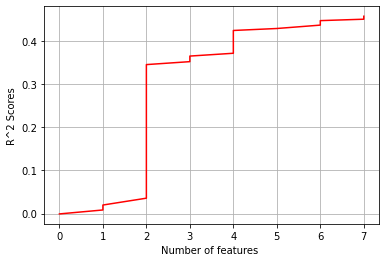

In [7]:
featureList, scoreList, features2, features0, features6, features7 = [],[],[],[],[],[]

for alpha in range(1,50):
    lassoAlpha = Lasso(alpha = alpha)
    lassoAlpha.fit(X_trainScaled,y_trainNew)
    scoreList.append(lassoAlpha.score(X_testScaled,y_testNew))
    featureList.append(np.sum(lassoAlpha.coef_!= 0))
    if np.sum(lassoAlpha.coef_!= 0) == 0:
        features0.append(alpha)
    if np.sum(lassoAlpha.coef_!= 0) == 2:
        features2.append(alpha) 
    if np.sum(lassoAlpha.coef_!= 0) == 6:
        features6.append(alpha)        
    if np.sum(lassoAlpha.coef_!= 0) == 7:
        features7.append(alpha)                
    
X = featureList
y = scoreList
plt.xlabel('Number of features ')
plt.ylabel('R^2 Scores')
plt.grid()
plt.plot(X, y,'r-')

print("Values of alpha for no features selected")
print(features0)
print()

print("Values of alpha for 2 features selected")
print(features2)
print()

print("Values of alpha for 6 features selected")
print(features6)
print()

print("Values of alpha for 7 features selected")
print(features7)
print()


The graph displays an increasing value for the Lasso score as the number of features increases. For higher number of features the values of alpha tend to decrease (between 1 and 2) whereas for lesser number of features the value for alpha increases. 

### 1.9 Obtaining optimum alpha using cross validation (Task 10)

In [8]:
optimalScore = np.NINF
alpha = optimalAlpha = 0.01

while alpha < 5:
    calculatedLasso = Lasso(alpha = alpha)
    calculatedLasso.fit(X_trainScaled, y_trainNew)
    calculatedScoreList = cross_val_score(calculatedLasso, X_trainScaled, y_trainNew, cv = 5)
    calculatedScore = np.mean(calculatedScoreList)
    if calculatedScore > optimalScore:
        optimalScore = calculatedScore
        optimalAlpha = alpha
    alpha += 0.01

print("Optimal value for alpha: ")
print(optimalAlpha)
print()
optimalLasso = Lasso(alpha = optimalAlpha)
optimalLasso.fit(X_trainScaled, y_trainNew)
optimalLassoScoreTrain = optimalLasso.score(X_trainScaled, y_trainNew)
optimalLassoScoreTest = optimalLasso.score(X_testScaled, y_testNew)
noOfFeatures = np.sum(optimalLasso.coef_!= 0)
optimalFeatureList = [ diabetes.feature_names[feature] for feature in np.where(optimalLasso.coef_ != 0)[0] ] 

print("Optimal Lasso score for training dataset:")
print(optimalLassoScoreTrain)
print()
print("Optimal Lasso score for test dataset:")
print(optimalLassoScoreTest)
print()
print("Number of features :")
print(noOfFeatures)
print()
featureListLasso = [ diabetes.feature_names[feature] for feature in np.where(optimalLasso.coef_ != 0)[0] ] 
print("Optimal Final feature list as computed by Lasso using CV:")
print(featureListLasso)
print()

Optimal value for alpha: 
1.460000000000001

Optimal Lasso score for training dataset:
0.522978902030274

Optimal Lasso score for test dataset:
0.4541159676120279

Number of features :
7

Optimal Final feature list as computed by Lasso using CV:
['sex', 'bmi', 'bp', 's1', 's3', 's5', 's6']



The above observation confirms our observations from Task 9. The optimal value for alpha lies between 1 and 2 (1.46) with teh number of features as 7.  

# 2. Implementing the inductive conformal predictor (Task 11)

### 2.1 Splitting dataset

In [9]:
X_trainProper, X_calibration, y_trainProper, y_calibration = \
train_test_split( X_trainNew, y_trainNew, test_size = 99, random_state = 2110)

### 2.2 Preprocessing data using StandardScaler

In [10]:
calibScaler = StandardScaler()
calibScaler.fit(X_trainProper)
X_trainProperScaled = calibScaler.transform(X_trainProper)
X_calibrationScaled = calibScaler.transform(X_calibration)
X_testNewScaled = calibScaler.transform(X_testNew)

### 2.3 Calculating prediction intervals and error rates

In [11]:
optimalCalibScore = np.NINF
alphaCalib = optimalCalibAlpha = 0.01

while alphaCalib < 5:
    calculatedCalibLasso = Lasso(alpha = alphaCalib)
    calculatedCalibLasso.fit(X_trainProperScaled, y_trainProper)
    calculatedScoreCalibList = cross_val_score(calculatedCalibLasso, X_trainProperScaled, y_trainProper, cv = 5)
    calculatedCalibScore = np.mean(calculatedScoreCalibList)
    if calculatedCalibScore > optimalCalibScore:
        optimalCalibScore = calculatedCalibScore
        optimalCalibAlpha = alphaCalib
    alphaCalib += 0.01

finalCalibLasso = Lasso(alpha = optimalCalibAlpha)
finalCalibLasso.fit(X_trainProperScaled, y_trainProper)
y_calibrationPredicted = finalCalibLasso.predict(X_calibrationScaled)
nonConformityScores = np.sort([abs(y_calibration[i] - y_calibrationPredicted[i]) for i in range(len(y_calibration))])
kfor5 = np.ceil((1 - 0.05) * (1 + len(nonConformityScores)))
kfor20 = np.ceil((1 - 0.2) * (1 + len(nonConformityScores)))

In [12]:
alphaForK5 = nonConformityScores[int(kfor5)]
alphaForK20 = nonConformityScores[int(kfor20)]

In [13]:
y_testPredicted = finalCalibLasso.predict(X_testNewScaled)

intervalsForK5 = [ [y_testPredicted[i] - alphaForK5, y_testPredicted[i] + alphaForK5] for i in range(len(y_testPredicted))]
intervalsForK20 = [ [y_testPredicted[i] - alphaForK20, y_testPredicted[i] + alphaForK20] for i in range(len(y_testPredicted))]

intervalLengthsK5 = [ item[1] - item[0] for item in intervalsForK5]
intervalLengthsK20 = [ item[1] - item[0] for item in intervalsForK20]

errorRatesListForK5 = [ True if intervalsForK5[i][0] <= y_testNew[i] <= intervalsForK5[i][1] else False for i in range(len(y_testNew)) ]
errorRatesListForK20 = [ True if intervalsForK20[i][0] <= y_testNew[i] <= intervalsForK20[i][1] else False for i in range(len(y_testNew)) ]

errorRateForK5 = 1 - (sum(np.array(errorRatesListForK5, dtype=bool))/len(errorRatesListForK5))
errorRateForK20 = 1 - (sum(np.array(errorRatesListForK20, dtype=bool))/len(errorRatesListForK20))

print("Interval lengths for K5: ")
print(intervalLengthsK5)
print()
print("Interval lengths for K20: ")
print(intervalLengthsK20)
print()

print("Error rate for K5: ")
print(errorRateForK5)
print()
print("Error rate for K20: ")
print(errorRateForK20)
print()


Interval lengths for K5: 
[219.60567725394904, 219.60567725394907, 219.60567725394907, 219.60567725394907, 219.60567725394904, 219.60567725394904, 219.60567725394907, 219.60567725394907, 219.60567725394904, 219.6056772539491, 219.6056772539491, 219.60567725394904, 219.60567725394907, 219.60567725394907, 219.60567725394907, 219.60567725394904, 219.60567725394904, 219.60567725394904, 219.60567725394907, 219.60567725394904, 219.6056772539491, 219.60567725394907, 219.60567725394907, 219.60567725394904, 219.60567725394907, 219.60567725394904, 219.60567725394907, 219.60567725394904, 219.6056772539491, 219.6056772539491, 219.60567725394907, 219.60567725394907, 219.60567725394904, 219.60567725394904, 219.60567725394907, 219.60567725394907, 219.6056772539491, 219.60567725394904, 219.6056772539491, 219.60567725394907, 219.60567725394904, 219.60567725394907, 219.60567725394904, 219.60567725394907, 219.60567725394907, 219.60567725394904, 219.60567725394907, 219.60567725394907, 219.60567725394907, 

# 3. Conclusions and obtained values

<b> 1. The training and test R2 for the Lasso model with default parameters on the scikit-learn version of diabetes and the number of features used. </b>

Lasso score for training dataset:
0.3779757862584656

Lasso score for test dataset:
0.33115694449502453

Final feature list as computed by Lasso:
['bmi', 's5']

<b> 2. The training and test R2 for the Lasso model with default parameters on the original version of diabetes and the number of features used. </b>

Lasso score for training dataset:
0.5226383603039815

Lasso score for test dataset:
0.46347459731826823

Final feature list as computed by Lasso:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's5', 's6']

<b> 3. The training and test R2 for the Lasso model with default parameters on your version of diabetes (i.e., on the original version of diabetes with the features normalized by you); the number of features used. </b>

Lasso score for training dataset:
0.524430881546436

Lasso score for test dataset:
0.45692798626144226

Final feature list as computed by Lasso:
['sex', 'bmi', 'bp', 's1', 's3', 's5', 's6']

<b> 4. The training and test R2 for the Lasso model with the best parameters chosen by cross-validation on your version of diabetes; the number of features used. </b>

Optimal value for alpha: 
1.460000000000001

Optimal Lasso score for training dataset:
0.522978902030274

Optimal Lasso score for test dataset:
0.4541159676120279

Number of features :
7

Optimal Final feature list as computed by Lasso using CV:
['sex', 'bmi', 'bp', 's1', 's3', 's5', 's6']


<b> 5. The lengths of prediction intervals and their test error rates at signifi- cance levels 5% and 20% (if you are implementing an inductive conformal predictor). </b>

Interval lengths for K5: 
[219.60567725394904, 219.60567725394907, 219.60567725394907, 219.60567725394907, 219.60567725394904, 219.60567725394904, 219.60567725394907, 219.60567725394907, 219.60567725394904, 219.6056772539491, 219.6056772539491, 219.60567725394904, 219.60567725394907, 219.60567725394907, 219.60567725394907, 219.60567725394904, 219.60567725394904, 219.60567725394904, 219.60567725394907, 219.60567725394904, 219.6056772539491, 219.60567725394907, 219.60567725394907, 219.60567725394904, 219.60567725394907, 219.60567725394904, 219.60567725394907, 219.60567725394904, 219.6056772539491, 219.6056772539491, 219.60567725394907, 219.60567725394907, 219.60567725394904, 219.60567725394904, 219.60567725394907, 219.60567725394907, 219.6056772539491, 219.60567725394904, 219.6056772539491, 219.60567725394907, 219.60567725394904, 219.60567725394907, 219.60567725394904, 219.60567725394907, 219.60567725394907, 219.60567725394904, 219.60567725394907, 219.60567725394907, 219.60567725394907, 219.6056772539491, 219.60567725394907, 219.60567725394907, 219.60567725394907, 219.60567725394907, 219.60567725394904, 219.60567725394904, 219.60567725394907, 219.60567725394907, 219.60567725394904, 219.60567725394907, 219.60567725394907, 219.60567725394907, 219.6056772539491, 219.60567725394907, 219.60567725394907, 219.60567725394907, 219.60567725394907, 219.60567725394907, 219.60567725394907, 219.60567725394907, 219.60567725394904, 219.6056772539491, 219.60567725394907, 219.60567725394904, 219.60567725394904, 219.60567725394907, 219.60567725394907, 219.60567725394904, 219.60567725394904, 219.60567725394907, 219.60567725394904, 219.6056772539491, 219.60567725394907, 219.60567725394907, 219.60567725394907, 219.60567725394907, 219.60567725394907, 219.60567725394907, 219.60567725394907, 219.60567725394904, 219.60567725394907, 219.60567725394907, 219.60567725394907, 219.60567725394907, 219.60567725394907, 219.60567725394907, 219.60567725394907, 219.60567725394907, 219.6056772539491, 219.60567725394907, 219.60567725394907, 219.60567725394907, 219.6056772539491, 219.60567725394907, 219.6056772539491, 219.60567725394907, 219.60567725394907, 219.60567725394904, 219.60567725394907, 219.60567725394904, 219.60567725394907]

Interval lengths for K20: 
[155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903977, 155.20547315903977, 155.20547315903974, 155.20547315903974, 155.20547315903977, 155.20547315903974, 155.2054731590397, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903977, 155.20547315903974, 155.20547315903977, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903977, 155.20547315903974, 155.20547315903977, 155.20547315903974, 155.20547315903974, 155.2054731590397, 155.2054731590397, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903977, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903977, 155.2054731590397, 155.20547315903974, 155.20547315903977, 155.20547315903974, 155.20547315903977, 155.20547315903974, 155.20547315903974, 155.20547315903977, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.2054731590397, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903977, 155.20547315903977, 155.20547315903974, 155.20547315903974, 155.20547315903977, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.2054731590397, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903977, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903977, 155.2054731590397, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903977, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.2054731590397, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.2054731590397, 155.20547315903974, 155.2054731590397, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903974, 155.20547315903977, 155.20547315903974]

Error rate for K5: 
0.04504504504504503

Error rate for K20: 
0.16216216216216217
